In [4]:
import csv
import MySQLdb

input_file='c:/data/db/input.csv'
#mysql 서버에 접속
conn=MySQLdb.connect(host='localhost', port=3306,db='my_suppliers',user='python',passwd='1234',charset='utf8')
cursor = conn.cursor() #select 명령어는 반드시 cursor가 필요
file_reader = csv.reader(open(input_file)) #csv파일을 불러옴
header = next(file_reader)#첫 행을 읽음
for row in file_reader:
    data=[]
    for idx in range(len(header)):
        data.append(row[idx])
    print(data)
    #mysql에 저장
    cursor.execute('insert into suppliers values (%s,%s,%s,%s,%s)',data)
conn.commit()
cursor.execute('select * from suppliers')
rows = cursor.fetchall()
for row in rows:
    output=[]
    for idx in range(len(row)):
        output.append(str(row[idx]))#리스트에 추가
    print(output)

['A', '001-1001', '2341', '500000', '2014-01-20']
['A', '001-1001', '2341', '500000', '2014-01-20']
['A', '001-1001', '5467', '750000', '2014-01-20']
['A', '001-1001', '5467', '750000', '2014-01-20']
['B', '50-9501', '7009', '250000', '2018-01-30']
['B', '50-9501', '7009', '250000', '2018-01-30']
['B', '50-9505', '6650', '125000', '2017-02-03']
['B', '50-9505', '6650', '125000', '2017-02-03']
['C', '920-4803', '3321', '615000', '2017-02-03']
['C', '920-4804', '3321', '615000', '2017-02-10']
['C', '920-4805', '3321', '615000', '2017-02-17']
['C', '920-4806', '3321', '615000', '2017-02-24']
['A', '001-1001', '2341', '500000.0', '2014-01-20']
['A', '001-1001', '2341', '500000.0', '2014-01-20']
['A', '001-1001', '5467', '750000.0', '2014-01-20']
['A', '001-1001', '5467', '750000.0', '2014-01-20']
['B', '50-9501', '7009', '250000.0', '2018-01-30']
['B', '50-9501', '7009', '250000.0', '2018-01-30']
['B', '50-9505', '6650', '125000.0', '2017-02-03']
['B', '50-9505', '6650', '125000.0', '2017-

In [7]:
output_file='c:/data/db/mysql_output.csv'
cursor=conn.cursor()
filewriter=csv.writer(open(output_file,'w'))
header=['Supplier Name', 'Invoice Number', 'Part Number', 'Cost', 'Purchase Date']
filewriter.writerow(header)
cursor.execute('select * from suppliers where cost > 500000')
rows = cursor.fetchall()
for row in rows:
    filewriter.writerow(row)

In [8]:
sql='update suppliers set cost=%s, purchase_date=%s where supplier_name=%s'
cursor.execute(sql, (777,'2014-01-20','A'))
conn.commit()

In [9]:
cursor.execute('select * from suppliers')
rows=cursor.fetchall()
for row in rows:
    output=[]
    for idx in range(len(row)):
        output.append(str(row[idx]))
    print(output)

['A', '001-1001', '2341', '777.0', '2014-01-20']
['A', '001-1001', '2341', '777.0', '2014-01-20']
['A', '001-1001', '5467', '777.0', '2014-01-20']
['A', '001-1001', '5467', '777.0', '2014-01-20']
['B', '50-9501', '7009', '250000.0', '2018-01-30']
['B', '50-9501', '7009', '250000.0', '2018-01-30']
['B', '50-9505', '6650', '125000.0', '2017-02-03']
['B', '50-9505', '6650', '125000.0', '2017-02-03']
['C', '920-4803', '3321', '615000.0', '2017-02-03']
['C', '920-4804', '3321', '615000.0', '2017-02-10']
['C', '920-4805', '3321', '615000.0', '2017-02-17']
['C', '920-4806', '3321', '615000.0', '2017-02-24']


In [2]:
import MySQLdb
conn=MySQLdb.connect(host='localhost', port=3306, db='ontime', user='python', passwd='1234')
cursor=conn.cursor()
cursor.execute('select * from ontime limit 5')
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(2008, 1, 3, 4, 2003, 1955, 2211, 2225, 'WN', 335, 'N712SW', 128, 150, 116, -14, 8, 'IAD', 'TPA', 810, 4, 8, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 754, 735, 1002, 1000, 'WN', 3231, 'N772SW', 128, 145, 113, 2, 19, 'IAD', 'TPA', 810, 5, 10, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 628, 620, 804, 750, 'WN', 448, 'N428WN', 96, 90, 76, 14, 8, 'IND', 'BWI', 515, 3, 17, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 926, 930, 1054, 1100, 'WN', 1746, 'N612SW', 88, 90, 78, -6, -4, 'IND', 'BWI', 515, 3, 7, 0, '', '0', 0, 0, 0, 0, 0)
(2008, 1, 3, 4, 1829, 1755, 1959, 1925, 'WN', 3920, 'N464WN', 90, 90, 77, 34, 34, 'IND', 'BWI', 515, 3, 10, 0, '', '0', 2, 0, 0, 0, 32)


In [6]:
#항공사별 출발 지연시간의 평균
import MySQLdb
conn=MySQLdb.connect(host='localhost', port=3306, db='ontime', user='python', passwd='1234')
cursor=conn.cursor()
cursor.execute('''select uniquecarrier,
avg(depdelay)
from ontime
group by uniquecarrier''')
rows = cursor.fetchall()
for row in rows:
    print(f'{row[0]}\t{row[1]}')

cursor.close()
conn.close()

WN	10.2763
XE	11.0937
YV	11.5720
OH	11.1605
OO	7.2953
UA	13.7844
US	5.6355
DL	7.8880
EV	11.7114
F9	5.9011
FL	9.1839
HA	0.4511
MQ	10.2998
NW	6.4098
9E	6.5856
AA	12.8999
AQ	-1.3903
AS	6.7527
B6	12.4477
CO	13.0236


In [9]:
#2008년 도착 지연횟수 월별 집계
import MySQLdb
conn=MySQLdb.connect(host='localhost', port=3306, db='ontime', user='python', passwd='1234')
cursor=conn.cursor()
cursor.execute('''select month,
count(*)
from ontime
where year=2008 and arrdelay > 0
group by month''')
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 279427)
(2, 278902)
(3, 294556)
(4, 256142)
(5, 254673)
(6, 295897)
(7, 264630)
(8, 239737)
(9, 169959)
(10, 183582)
(11, 181506)
(12, 280493)


In [10]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])

print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[279427, 278902, 294556, 256142, 254673, 295897, 264630, 239737, 169959, 183582, 181506, 280493]


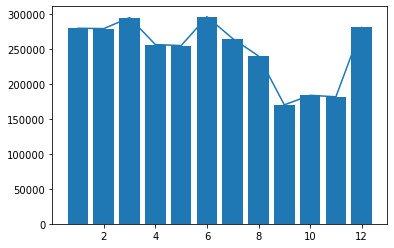

In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.bar(x,y)
plt.show() #그래프 제목 삭제

In [14]:
#요일별 평귣 지연시간
import MySQLdb
conn=MySQLdb.connect(host='localhost', port=3306, db='ontime', user='python', passwd='1234')
cursor=conn.cursor()
cursor.execute('''select dayofweek,
avg(arrdelay)
from ontime
group by dayofweek
order by dayofweek''')
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, Decimal('8.0303'))
(2, Decimal('7.2923'))
(3, Decimal('6.3798'))
(4, Decimal('8.2465'))
(5, Decimal('10.6752'))
(6, Decimal('5.6825'))
(7, Decimal('9.2941'))


In [15]:
x=['월','화','수','목','금','토','일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[Decimal('8.0303'), Decimal('7.2923'), Decimal('6.3798'), Decimal('8.2465'), Decimal('10.6752'), Decimal('5.6825'), Decimal('9.2941')]


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

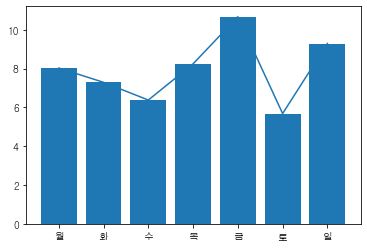

In [16]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rc, font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font', family=font_name)

plt.plot(x,y)
plt.bar(x,y)
plt.xticks(rotation=0)

In [17]:
# 시간대별(10월, 월요일에 출발할 때 가장 좋은 시간대)
import MySQLdb
conn=MySQLdb.connect(host='localhost', port=3306, db='ontime', user='python', passwd='1234')
cursor=conn.cursor()
cursor.execute('''select CRSDepTime,
avg(arrdelay) arrdelay
from ontime
where month=10 and dayofweek=1
group by CRSDepTime
order by avg(arrdelay)
limit 1''')

rows = cursor.fetchall()
for row in rows:   
    print(row)

cursor.close()
conn.close()

(2202, Decimal('-28.0000'))
